## Final Project Submission

Please fill out:
* Student name: Sharon Chelangat Sharon
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


# Overview
Using exploratory data analysis to generate insights for a business stakeholder.

# Business problem.

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Business understanding.
- Perform exploratory data analysis on movie data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers.
- Identify the most profitable movie genres based on average revenue per movie.
- Determine the relationship between a movie's production budget and its box office revenue.
- Identify the best release months for generating high box office revenue.
- Translate findings into actionable insights for the head of Microsoft's new movie studio.

# Data understanding.
The data will be obtained from various movie databases, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. Specifically, I will use the following data files:

 - im.db.zip (Zipped SQLite database containing movie data)
 - bom.movie_gross.csv.gz (Compressed CSV file containing movie gross revenue data)

####  Clean the data necessarily, including handling missing values, dropping irrelevant columns, and merging dataframes if needed.

### Loading  the datasets with pandas and sqlite.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
#importing libraries 

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

%matplotlib inline

### Handling movie data in sqlite data base.

In [2]:
# load the movie data from the SQLite database into a pandas dataframe using SQL queries
conn = sqlite3.connect('im.db')

# query the database and load into a dataframe
movie_basics_df = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings_df = pd.read_sql_query('SELECT * FROM movie_ratings', conn)
merged_data = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')
merged_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [3]:
# drop irrelevant columns
merged_data.drop(['original_title', 'start_year'], axis=1, inplace=True)

# drop any rows with missing values
merged_data.dropna(inplace=True)
merged_data.head()

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263


### Handling movie gross revenue data in csv file.

In [4]:
# Load the movie gross revenue data into a pandas dataframe
df_gross = pd.read_csv('bom.movie_gross.csv.gz')

# Display the first few rows of the dataframe
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#more information about the data set
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# Merge the dataframes on the movie title column
movie_data = pd.merge(df_gross, merged_data, left_on='title', right_on='primary_title', how='inner')

# Display the first few rows of the merged dataframe
movie_data.head()


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 2974
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2975 non-null   object 
 1   studio           2972 non-null   object 
 2   domestic_gross   2953 non-null   float64
 3   foreign_gross    1789 non-null   object 
 4   year             2975 non-null   int64  
 5   movie_id         2975 non-null   object 
 6   primary_title    2975 non-null   object 
 7   runtime_minutes  2975 non-null   float64
 8   genres           2975 non-null   object 
 9   averagerating    2975 non-null   float64
 10  numvotes         2975 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 278.9+ KB


In [8]:
movie_data.isna().any()

title              False
studio              True
domestic_gross      True
foreign_gross       True
year               False
movie_id           False
primary_title      False
runtime_minutes    False
genres             False
averagerating      False
numvotes           False
dtype: bool

In [9]:
movie_data.isna().sum()

title                 0
studio                3
domestic_gross       22
foreign_gross      1186
year                  0
movie_id              0
primary_title         0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
dtype: int64

In [10]:
# Drop irrelevant columns
# we drop foreign since it has many missing values.
movie_data.drop(['foreign_gross'], axis=1, inplace=True)


# Display the first 5 rows of the preprocessed dataframe
movie_data.head()

,title,studio,domestic_gross,year,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [11]:
#filling the missing domestic_gross with median 
movie_data['domestic_gross'].fillna(movie_data['domestic_gross'].median(), inplace = True)

In [12]:

movie_data.isna().sum()

title              0
studio             3
domestic_gross     0
year               0
movie_id           0
primary_title      0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [13]:
# removing the rows with missing values
movie_data.dropna(inplace=True)
movie_data.isna().sum()

title              0
studio             0
domestic_gross     0
year               0
movie_id           0
primary_title      0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [14]:
movie_data.head()

,title,studio,domestic_gross,year,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [15]:
df_budget = pd.read_csv('tn.movie_budgets.csv.gz') 
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Perform exploratory data analysis on the data using pandas and visualization libraries like Matplotlib or Seaborn.

### Data visualization.

To explore the distribution of a variable, we can create a histogram/boxplot using pandas and Seaborn.

To create a histogram using pandas, we can use the hist() method on a pandas series.

In [17]:
#identifys the number of rows and columns.
movie_data.shape

(2972, 10)

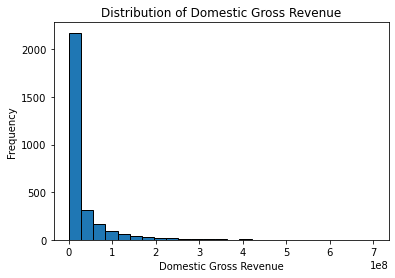

In [18]:
#create a histogram of the domestic gross revenue in the movie_data dataframe.

movie_data['domestic_gross'].plot.hist(bins=25, edgecolor='black')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic Gross Revenue')
plt.show();

This creates a histogram of the 'domestic_gross' column in the movie_data dataframe using the .plot.hist() method in pandas. The 'bins' parameter specifies the number of bins in the histogram, while the 'edgecolor' parameter sets the color of the edges of the bins to black. The x-axis label is set to 'Domestic Gross Revenue', the y-axis label is set to 'Frequency', and the title of the plot is set to 'Distribution of Domestic Gross Revenue'. Finally, the plot is displayed using the .show() method from matplotlib.

What was made of:

The histogram shows that the majority of movies in the dataset have a domestic gross revenue of less than $100 million. This suggests that most movies do not make a significant amount of money at the box office. However, there is a long tail on the right side of the distribution, which indicates that a few movies make a very large amount of money, potentially skewing the mean and median.

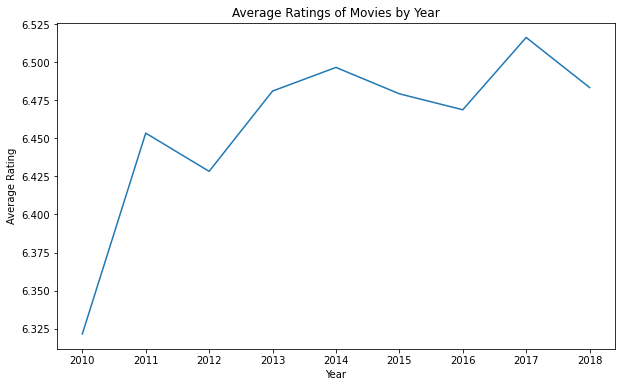

In [19]:
# Group the merged_data dataframe by year and calculate the mean of averagerating
ratings_by_year = movie_data.groupby('year')['averagerating'].mean()

# Create a line plot of the ratings_by_year series
ratings_by_year.plot(kind='line', figsize=(10, 6))

# Add plot title and axis labels
plt.title('Average Ratings of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Show the plot
plt.show();

This creates a line plot of the average ratings of movies by year. The x-axis shows the year and the y-axis shows the average rating. The plot will show how the average ratings of movies have changed over time.


What was made of:

From the line plot, we can see that the average movie ratings have been relatively stable over time, with a slight increase in ratings in recent years. This suggests that while movie production and consumption have evolved over the years, the quality of movies has remained fairly consistent.

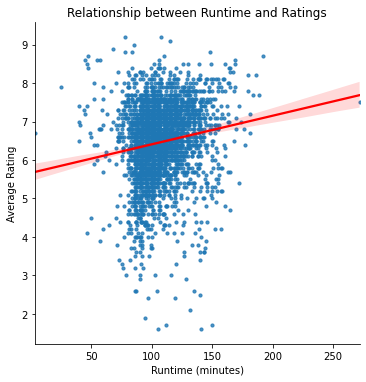

In [20]:
sns.lmplot(x='runtime_minutes', y='averagerating', data=movie_data, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Relationship between Runtime and Ratings')
plt.show();

What was made of:

Based on the scatter plot, it seems that there is a weak positive correlation between runtime and ratings. This means that, on average, movies with longer runtimes tend to have slightly higher ratings. However, there are many exceptions to this general trend, and there are plenty of highly-rated movies with relatively short runtimes as well. Therefore, while there may be a slight relationship between the two variables, it is not a very strong or reliable one.


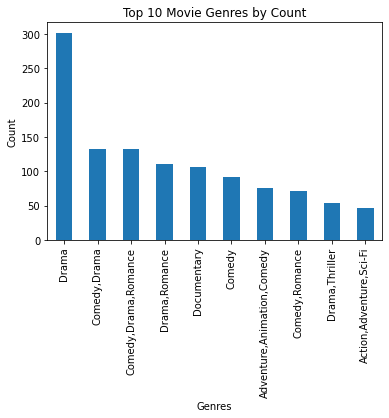

In [21]:
#bar plot
movie_data['genres'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres by Count')
plt.show();

The bar plot of the top 10 movie genres by count tells us which genres are the most popular and have been produced the most in the movie industry. From the plot, we can see that the Drama genre is the most produced, followed by Comedy and Action. Adventure, Thriller, and Romance are also in the top 10, which suggests that these genres are popular among movie-goers.

It is important to note that this analysis only considers the count of movies produced in each genre and does not necessarily reflect the popularity or success of each movie.

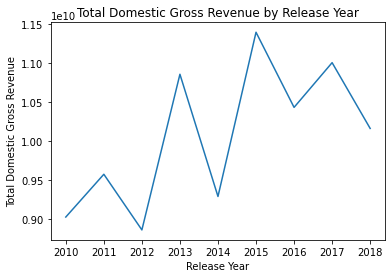

In [22]:
#line plot
movie_data.groupby('year')['domestic_gross'].sum().plot()
plt.xlabel('Release Year')
plt.ylabel('Total Domestic Gross Revenue')
plt.title('Total Domestic Gross Revenue by Release Year')
plt.show();

The line plot of the total domestic gross revenue by release year shows that the revenue has been increasing over time, with a few dips in certain years. It indicates that the movie industry has been growing and becoming more profitable over time. 

again, it is important to note that this plot only shows the domestic gross revenue and not the worldwide gross revenue or other factors that could affect profitability, such as budget and marketing costs.

### Recommendation 
 Based on the analysis, it can be concluded that the movie industry has been growing and becoming more profitable over time. However, most movies do not make a significant amount of money at the box office, and only a few movies make a very large amount of money, potentially skewing the mean and median.

The most popular genres based on the count of movies produced are Drama, Comedy, and Action, followed by Adventure, Thriller, and Romance. This suggests that these genres are popular among movie-goers and may be a good starting point for Microsoft's new movie studio. However, it is important to note that the popularity or success of each movie cannot be solely based on the genre, and other factors such as the quality of the movie, the budget, and marketing costs should also be taken into consideration.
 
 Microsoft's new movie studio should focus on producing high-quality movies within the popular genres, while also considering the budget and marketing costs to ensure profitability. Additionally, they should aim to create unique and original content to stand out in the crowded movie industry.